In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
path = 'C:\\Users\\jsharmon\\Desktop\\ius-abstract\\'
control = pd.read_csv(path+'M1-control-didnt-work-correct-orientation.csv')
slow = pd.read_csv(path+'M14-slow-correct-orientation.csv')
fast = pd.read_csv(path+'M3-fast-correct-orientation.csv')

In [10]:
control = control[control['times'] >= 5]
control['times'] = control['times'] - 5.0015
control.head()

,times,rollavg,raw
116,0.0000,0.22319,0.22401
117,0.0431,0.22322,0.22392
118,0.0862,0.22327,0.22394
119,0.1293,0.22333,0.22370
120,0.1724,0.22338,0.22355


In [15]:
# Normalize to initial value for plot
control['rollavg'] = control['rollavg']/control.loc[116, 'rollavg']
slow['rollavg'] = slow['rollavg']/slow.loc[0, 'rollavg']
fast['rollavg'] = fast['rollavg']/fast.loc[0, 'rollavg']

<IPython.core.display.Javascript object>


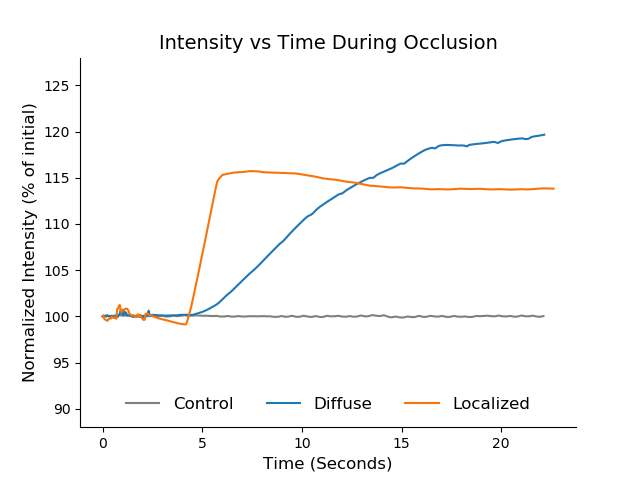

In [69]:
%matplotlib notebook

plt.plot(control['times'], control['rollavg']*100, color='grey', label='Control')
plt.plot(slow['times'], slow['rollavg']*100, color='#1f78b4', label = 'Diffuse')
plt.plot(fast['times'], fast['rollavg']*100, color='xkcd:orange', label = 'Localized')

ax = plt.gca()
ax.spines['top'].set_visible(0)
ax.spines['right'].set_visible(0)

ax.set_ylim([88, 128])

plt.tick_params(labelsize=10)

plt.legend(frameon=0, ncol=3, loc='lower center', fontsize=12)
plt.title('Intensity vs Time During Occlusion', fontsize=14)
plt.xlabel('Time (Seconds)', fontsize=12)
plt.ylabel('Normalized Intensity (% of initial)', fontsize=12)

plt.savefig(path + 'intensity-time-curve.tif', dpi=350)